# Number of Books Read - Simple Linear Regression

A simple linear regression is a linear approximation of a casual relationship between two variables - the traget (Dependent/ Y variable) and the feature (Independent/ X variable)

## Define the Problem
Can the number of books read per month be predicted based on weekly reading hours?


#### Overview:
This dataset aims to predict the number of books read per month based on the number of hours spent reading each week. This is a fabricated dataset for a simple linear regression analysis.

#### Features:
HoursSpentReading (Feature): The number of hours spent reading per week, ranging from 0 to 20 hours. This feature captures the amount of time an individual dedicates to reading each week.
BooksRead (Target): The number of books read per month, with values ranging from 0 to 10 books. This target variable represents the outcome influenced by the amount of weekly reading time.

---



### Import Libraries

Working in Python 3.9.12 and the Package versions are:
- pandas: 1.5.3
- numpy: 1.23.5
- statsmodels: 0.14.2
- matplotlib: 3.9.2
- seaborn: 0.13.2
- scikit-learn: 1.2.2

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression

### Load Data

In [2]:
raw_data = pd.read_csv('book_read.csv')
raw_data

,HoursSpentReading,BooksRead
0,0.000000,0.000000
1,0.021000,0.030000
2,0.748357,0.193161
3,2.744418,0.374320
4,0.100000,0.417181
...,...,...
295,17.452487,4.937004
296,19.554683,4.990000
297,18.333638,4.995400
298,19.644281,5.000000


### Preprocessing
---

In [3]:
data = raw_data.copy()
data.head(10)

,HoursSpentReading,BooksRead
0,0.000000,0.000000
1,0.021000,0.030000
2,0.748357,0.193161
3,2.744418,0.374320
4,0.100000,0.417181
5,0.492698,0.435838
6,3.293144,0.459977
7,0.010000,0.500000
8,0.928915,0.518727
9,0.635807,0.541874


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HoursSpentReading  300 non-null    float64
 1   BooksRead          300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [5]:
data.describe()

,HoursSpentReading,BooksRead
count,300.000000,300.000000
mean,9.369195,2.594629
std,4.531502,1.157967
min,0.000000,0.000000
25%,6.125586,1.694887
50%,9.231365,2.582036
75%,12.599622,3.453016
max,20.000000,5.500000


From the analysis above, there are no null values and nothing is jumping out as disproportionate. Some visuals may help identifying anything out of the norm. 

## Regression Assumptions Check:
- Normality and Homoscedasticity of the error term 
- Linearity
- Endogeneity of Regressors
- No Autocorrelation 
- No Multicollinearity 

#### Check Normality with a Histogram

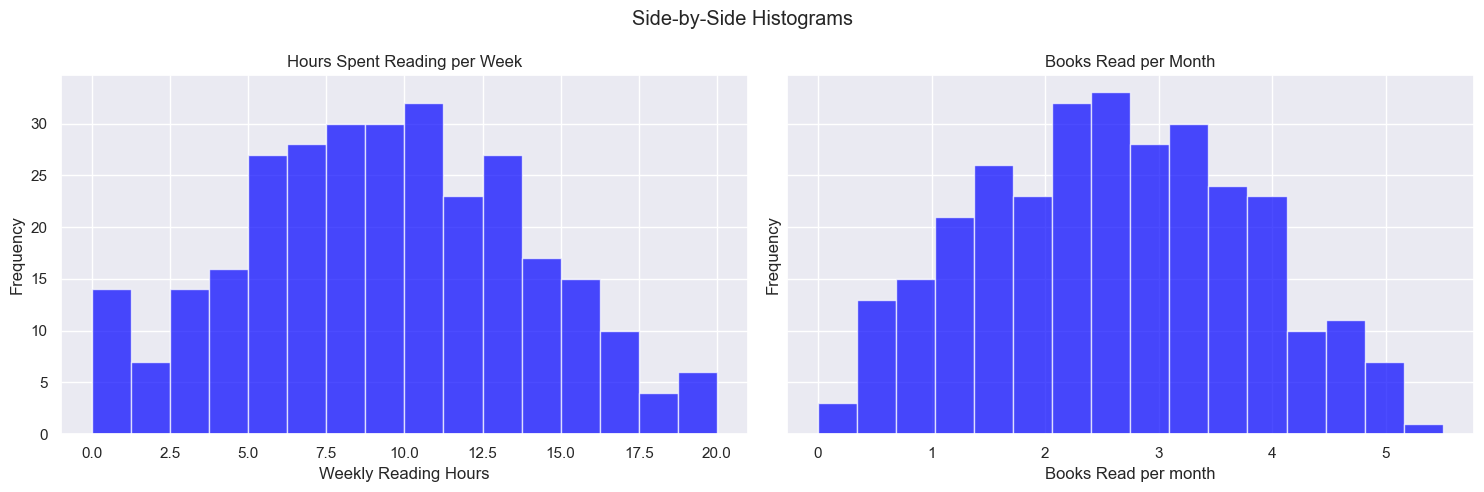

In [6]:
# Create a 1x2 grid of subplots
# sharey=True to use the same y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)  

# Plot each histogram on a separate subplot
axes[0].hist(data['HoursSpentReading'], bins = 16, color='blue', alpha=0.7)
axes[0].set_title('Hours Spent Reading per Week')
axes[0].set_xlabel('Weekly Reading Hours')
axes[0].set_ylabel('Frequency')

axes[1].hist(data['BooksRead'], bins = 16, color='blue', alpha=0.7)
axes[1].set_title('Books Read per Month')
axes[1].set_xlabel('Books Read per month')
axes[1].set_ylabel('Frequency')

# Add a main title
fig.suptitle('Side-by-Side Histograms')

# Display the plot
plt.tight_layout()
plt.show()

The histograms show a normality around both the hours spent reading per week as well as the books read per month

### Check Homoscedasticity and Linearity with a Scatter Plot

Text(0, 0.5, 'Books Read')

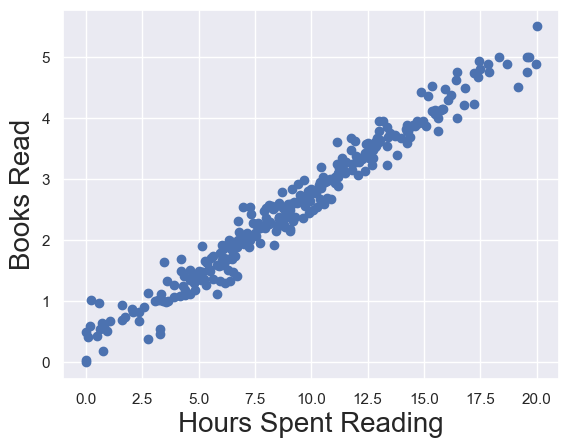

In [7]:
# Scatter plot
y = data['BooksRead']
x1 = data['HoursSpentReading']

plt.scatter(x1,y)
plt.xlabel('Hours Spent Reading', fontsize = 20)
plt.ylabel('Books Read', fontsize = 20)

The scatter plot illustrated Linearity as well as Homoscedasticity as there are not a visible display of outliers

### Check for Autocorrelation with the Durbin Watson Test

- The Durbin-Watson statistic ranges from 0 to 4: 2 indicates no autocorrelation while values below 1 and above 3 cause for alarm

    - Results 2: Indicates no autocorrelation.
    - Results 0 to <2: Indicates positive autocorrelation.
    - Results >2 to 4: Indicates negative autocorrelation.

In [8]:
# Add a constant to the independent variables
x = sm.add_constant(x1)

# Fit the OLS regression model
model = sm.OLS(y, x).fit()

# Calculate the Durbin-Watson statistic on the residuals
dw_statistic = durbin_watson(model.resid)
print("Durbin-Watson Statistic:", dw_statistic)

Durbin-Watson Statistic: 1.8658163700221526


The Result is 1.87 meaning there is a positive autocorrelation but close to 2 that this is not alarming.

### Check for Multicollinearity

As there is only one independent variable (HoursRead) there is no Multicollinearity as that can only arise when 2 or more features have a high correlation

### Check for Endogeneity
Check variables to make sure their p value <= 0.05 - if it is larger then they need to be removed

In [9]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
#.fit() applys estimation technique (OLS - ordinary least square) to obtain the fit of the model

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BooksRead   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     8559.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.52e-221
Time:                        13:07:18   Log-Likelihood:                 39.605
No. Observations:                 300   AIC:                            -75.21
Df Residuals:                     298   BIC:                            -67.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2411      0.028      8.534      0.000       0.185       0.297
HoursSpentReading     0.2512      0.003     92.516      0.000       0.246       0.257
==============================================================================
Omnibus:                        5.198   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                7.249
Skew:                           0.016   Prob(JB):                       0.0267
Kurtosis:                       3.761   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hours Spent Reading is has a p value < 0.05 meaning there is statistical evidence to suggest that Hours Spent Reading has a significant effect on the Number of Books read, at a 95% confidence level.

The R-squared is 0.966 meaning Hours Spent Reading explains 96.6% of the variability of the number of Books Read. This is a great model!

## Plot the Predictions using the Regression Line

Text(0, 0.5, 'Books Read')

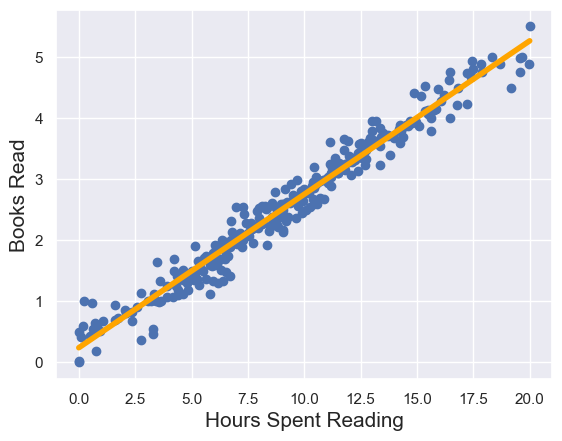

In [ ]:
# take the coef from the constant and HoursSpentReading and add them to the yhat equation
plt.scatter(x1,y)
yhat = 0.2411 + 0.2512*x1
fig = plt.plot(x1, yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('Hours Spent Reading', fontsize = 15)
plt.ylabel('Books Read', fontsize = 15)

## Regression Testing
---

In [11]:
# create a copy of the data
regression_data = data
regression_data

,HoursSpentReading,BooksRead
0,0.000000,0.000000
1,0.021000,0.030000
2,0.748357,0.193161
3,2.744418,0.374320
4,0.100000,0.417181
...,...,...
295,17.452487,4.937004
296,19.554683,4.990000
297,18.333638,4.995400
298,19.644281,5.000000


### Declare the Inputs and the Targets

In [12]:
# The Targets (y - dependent variable) is 'BooksRead'
targets = regression_data['BooksRead']

# The Inputs (x - independent variable) is 'HoursSpentReading'
inputs = regression_data['HoursSpentReading']

In [ ]:
# In order to feed x to sklearn, it should be a 2D array (a matrix) - need to reshape it
# This will not be needed when there is more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(300,1)
inputs_matrix = inputs.values.reshape(-1,1)

# Check the shape just in case
inputs_matrix.shape

(300, 1)

### Train Test Split
Split the data into training data and testing data - the testing data will be used once the model is ready

In [14]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# first argument refers to the x's & second argument refers to the y's
x_train, x_test, y_train, y_test = train_test_split(inputs_matrix, targets, test_size=0.2, random_state=365)

### Create the Regression

In [15]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [16]:
# Create a variable to store the predictions based on the training data
y_hat = reg.predict(x_train)

Text(0, 0.5, 'Predictions (y_hat)')

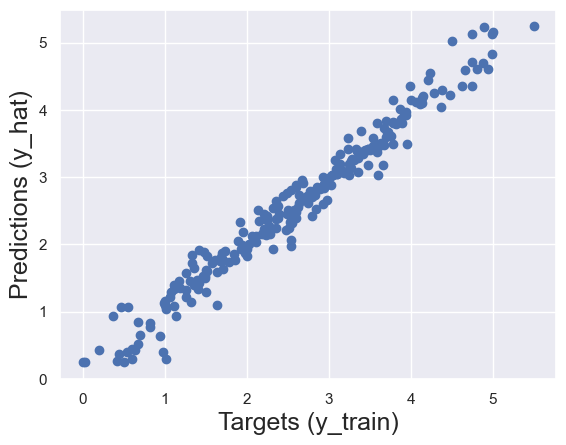

In [17]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

### Plot the Residuals

Text(0.5, 1.0, 'Residuals PDF')

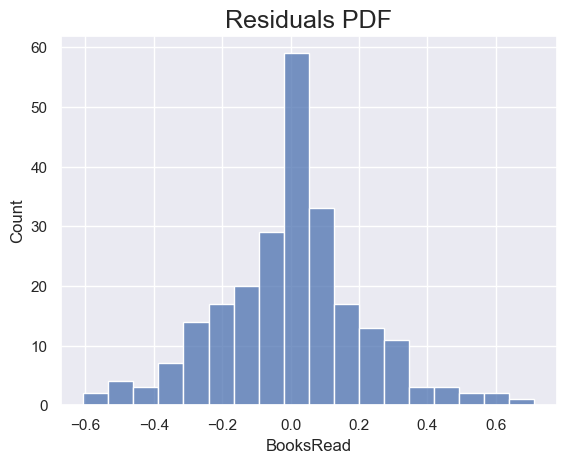

In [18]:
# Plot the PDF of the residuals and check for anomalies
sns.histplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

The plot is normally distributed

### Find the R Squared
This is the accuracy of the trained model

In [19]:
reg.score(x_train,y_train)

0.9672762175135476

### Find the Weights and Bias (intercept)

In [20]:
reg.intercept_

0.2431588151760109

In [21]:
reg.coef_

array([0.249836])

In [22]:
# Create a regression summary
reg_summary = pd.DataFrame([inputs.name], columns=['Features'])
reg_summary['Weights'] = reg.coef_
intercept_row = pd.DataFrame([['Intercept', reg.intercept_]], columns=['Features', 'Weights'])
reg_summary = pd.concat([intercept_row, reg_summary], ignore_index=True)
reg_summary


,Features,Weights
0,Intercept,0.243159
1,HoursSpentReading,0.249836


As the accuracy of the Training Model is 96.727% and the residuals are normally distributed - I am confident with my model and will test it on the testing data which the algorithm has never seen

### Testing

In [23]:
# Create a variable to hold the prediction of the x_test input variables
y_hat_test = reg.predict(x_test)

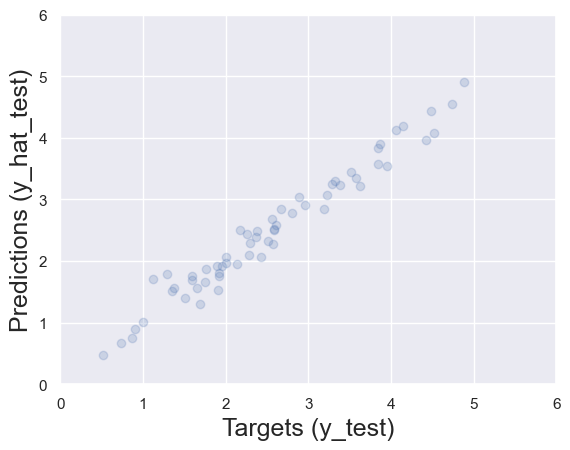

In [25]:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

For the most part, the test prediction are looking quite inline with the test targets. The bigger discrepancies are between 1 and 2.

In [26]:
# Create a DataFrame to manually check the predictions
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,1.914772
1,3.346746
2,0.755177
3,2.098847
4,4.907832


In [27]:
# Reset the index as the old indexes are preserved 
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    1.890919
1    3.581845
2    0.865621
3    2.288439
4    4.881579
Name: BooksRead, dtype: float64

In [28]:
# Add a 'Target' column with the appropriate values
df_pf['Target'] = y_test
df_pf.head(10)

,Prediction,Target
0,1.914772,1.890919
1,3.346746,3.581845
2,0.755177,0.865621
3,2.098847,2.288439
4,4.907832,4.881579
5,2.916527,2.964188
6,3.892895,3.863287
7,2.848277,3.193751
8,2.512891,2.588886
9,2.382712,2.362466


In [29]:
# Manually create the Residuals
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [30]:
# Manually create the absolute difference in %
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head(15)

,Prediction,Target,Residual,Difference%
0,1.914772,1.890919,-0.023853,1.261475
1,3.346746,3.581845,0.235099,6.563634
2,0.755177,0.865621,0.110444,12.758935
3,2.098847,2.288439,0.189592,8.284783
4,4.907832,4.881579,-0.026253,0.537799
5,2.916527,2.964188,0.047661,1.607898
6,3.892895,3.863287,-0.029607,0.766378
7,2.848277,3.193751,0.345473,10.817167
8,2.512891,2.588886,0.075995,2.935434
9,2.382712,2.362466,-0.020246,0.856965


In [31]:
# Exploring the descriptives here for additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,60.000000,60.000000,60.000000,60.000000
mean,2.501346,2.554887,0.053541,7.437170
std,1.033106,1.091075,0.207705,8.659047
min,0.475235,0.518727,-0.576792,0.039656
25%,1.756277,1.755715,-0.040969,1.596803
50%,2.413602,2.402180,0.039994,5.764618
75%,3.246018,3.335244,0.170726,9.955337
max,4.907832,4.881579,0.460728,51.291335


### Sort Data to view manually

In [32]:
# To see all rows, use the relevant pandas syntax
pd.options.display.max_rows = 60

# Display the result with only 2 digits after the dot
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
43,2.29,2.29,0.00,0.04
47,3.83,3.85,0.01,0.35
35,3.31,3.32,0.01,0.43
4,4.91,4.88,-0.03,0.54
26,2.78,2.81,0.02,0.77
6,3.89,3.86,-0.03,0.77
45,0.89,0.90,0.01,0.82
56,4.19,4.15,-0.04,0.85
9,2.38,2.36,-0.02,0.86
58,2.59,2.61,0.03,1.07


In all, this appears to be a mediocre model as it is just based on hours spent reading. 18% of the test predictions have a greater than 11% difference. There are many variables left out such as pages per book, reading speed, and difficulty of book for the individual. Those features could play a huge role in determining how long it takes an individual to read a book.